In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



In [57]:
#load the data
calorie_data = pd.read_csv('calories.csv')
calorie_data

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [58]:
#load excercise data
exercise_data = pd.read_csv('exercise.csv')
exercise_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [59]:
# combining both the datas
our_data = pd.concat([exercise_data,calorie_data['Calories']],axis=1)
our_data

#calories is output data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [60]:
#checking the no of rows and column
our_data.shape


(15000, 9)

In [61]:
#information of our data
print(our_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [62]:
#rectifying null values
our_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [63]:
our_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [64]:
#basic stats
our_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


/var/folders/1_/485f_kjs17vfb07d7xcpf_sr0000gp/T/ipykernel_24500/2488657549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(our_data['Gender'],palette=colors)


<Axes: xlabel='count', ylabel='Gender'>

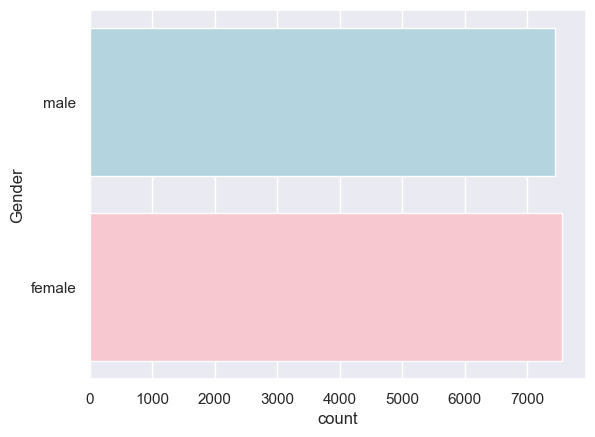

In [65]:
#data visualization 
sns.set()

#plotting calories vs gender column
colors = ['lightblue','pink']
sns.countplot(our_data['Gender'],palette=colors)

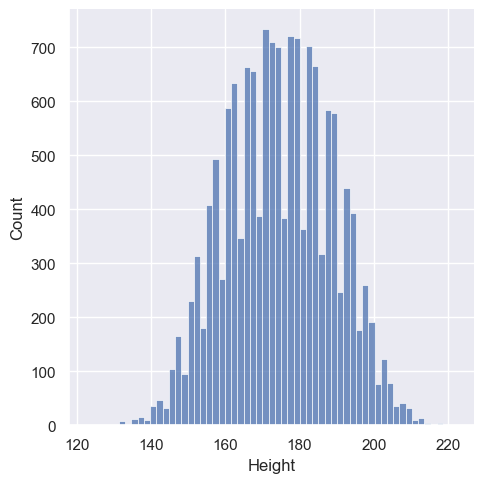

In [66]:
#height distribution
sns.displot(our_data['Height'],kind='hist')

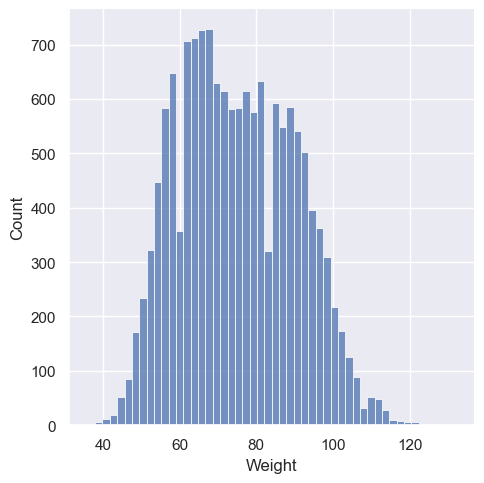

In [67]:
#weight distribution
sns.displot(our_data['Weight'])

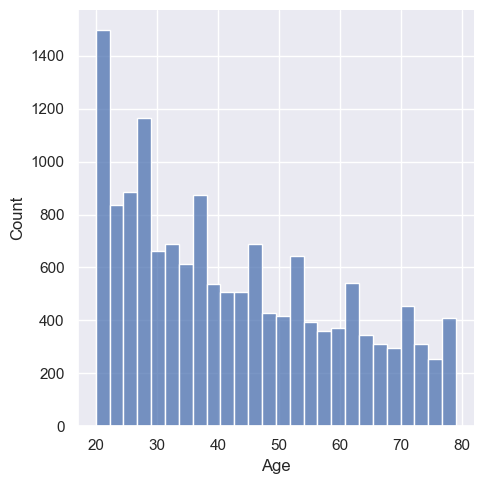

In [68]:
#age distribution
sns.displot(our_data['Age'])

In [81]:
#Finding Correlation in the dataset

# Correlation Coefficient: Numerical measure (-1 to 1) indicating 
# the strength and direction of the linear relationship between two variables.

# Positive Correlation: Coefficient near 1 signifies variables increase
# together; near -1 indicates one increases as the other decreases.

# Zero Correlation: Coefficient near 0 suggests no linear relationship; 
# however, non-linear associations may still exist.

# Cautions: Correlation does not imply causation; it highlights associations 
# but doesn't determine the cause-and-effect relationship.

num_data = our_data.select_dtypes(include='number')
Correlation = num_data.corr()

In [82]:
print(Correlation)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


<Axes: >

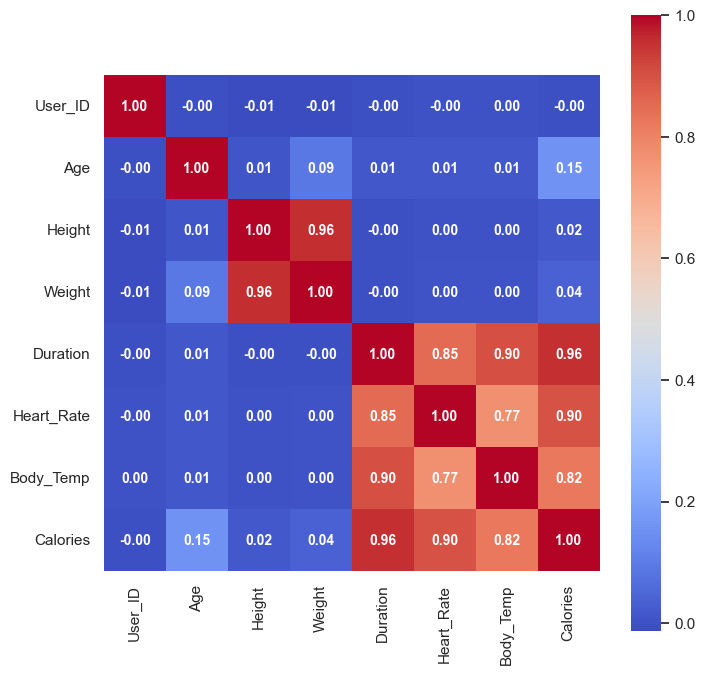

In [70]:
#heatmap of our numerical data
plt.figure(figsize=(8,8))
sns.heatmap(Correlation,cbar=True,square=True,fmt='.2f',annot=True,cmap='coolwarm' ,annot_kws={"size": 10, "weight": "bold"})

In [71]:
# Separating features and Target
x = num_data.drop(columns=['User_ID','Calories'])
y = num_data['Calories']


In [72]:
x

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,68,190.0,94.0,29.0,105.0,40.8
1,20,166.0,60.0,14.0,94.0,40.3
2,69,179.0,79.0,5.0,88.0,38.7
3,34,179.0,71.0,13.0,100.0,40.5
4,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4
14996,27,165.0,65.0,6.0,85.0,39.2
14997,43,159.0,58.0,16.0,90.0,40.1
14998,78,193.0,97.0,2.0,84.0,38.3


In [73]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [74]:
#Spliting data into test and train set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [75]:
#TRAIN OUR MODEL
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
# Predicting of our test data

calorie_predict = model.predict(x_test)
calorie_predict

array([127.66284 , 217.11703 ,  36.980682, ..., 146.00682 ,  23.630262,
        90.783676], dtype=float32)

In [79]:
mae = metrics.mean_absolute_error(y_test,calorie_predict)
mae

2.429606904198726

In [80]:
mse = metrics.mean_squared_error(y_test,calorie_predict)
mse

17.070734555655086